In [4]:
!curl http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq -o 'sources/SRR835775_1.first1000.fastq'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  219k  100  219k    0     0  2070k      0 --:--:-- --:--:-- --:--:--     0-:--:-- --:--:-- 2090k


In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [3]:
seqs, quals = readFastq('sources/SRR835775_1.first1000.fastq')

In [10]:
quals

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################',
 'CCCFFDFDHGHHDHHGIIIHGIJ<GBBBFBGGHDIH@B)?)0?F>DB#####################################################',
 "???=DD0@3ADB<<CE;+3<;EE?1:)1?C1?3BDCB@;)99)0;@;)-(.7A'55A1?.6;(6;.5;;??#############################",
 "@@@DDF?EFFHA;DDHGI<FDFGECCHF:C9DH9F3):??GHB)BFHEAHBG;C';C@EE45?#####################################",
 '@@@FADDFHGBFFHJJJFGEHGGGGCEGHCBFGGJ:D?FGIDHDFGIBFDGIJ=CEHDH7?=BFD@A;>AB5=2=?BB######################',
 '@CCFFADDHHH<CBGIICGGHIJI?FFGHJ?DHGIJ?DGIIIBFCHHI8@@GE

In [13]:
qualsDec = list(map(phred33ToQ, quals[0]))
lenquals = list(map(len, quals))

In [16]:
#

In [4]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [20]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    #print(hist)
    for read in qualityStrings:
        #print(read)
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
for i in range(0,50):
    print(i, h[i])

0 0
1 0
2 6178
3 0
4 0
5 54
6 108
7 574
8 345
9 83
10 193
11 124
12 79
13 165
14 49
15 236
16 184
17 327
18 514
19 238
20 531
21 254
22 313
23 798
24 992
25 888
26 1396
27 1488
28 993
29 1752
30 3387
31 4487
32 3248
33 5476
34 8375
35 11814
36 4243
37 7827
38 6579
39 8179
40 9349
41 8180
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0


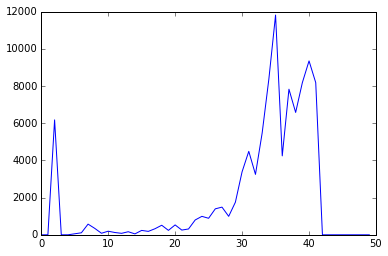

In [5]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()